In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## Задание 1.

Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?

* Построить точечный график
* Рассчитать коэффициенты корреляции Пирсона и Спирмена
* Построить модель линейной регрессии
* Рассчитать коэффициент детерминации
* Вывести график остатков


In [220]:
df = pd.read_csv('water.csv')

In [221]:
df.head(10)

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15
7,8,South,Bournemouth,1299,78
8,9,North,Bradford,1637,10
9,10,South,Brighton,1359,84


In [222]:
df.describe()

,Unnamed: 0,mortality,hardness
count,61.000000,61.000000,61.000000
mean,31.000000,1524.147541,47.180328
std,17.752934,187.668754,38.093966
min,1.000000,1096.000000,5.000000
25%,16.000000,1379.000000,14.000000
50%,31.000000,1555.000000,39.000000
75%,46.000000,1668.000000,75.000000
max,61.000000,1987.000000,138.000000


Text(0.5, 1.0, 'Mortality vs. Hardness for 61 UK cities')

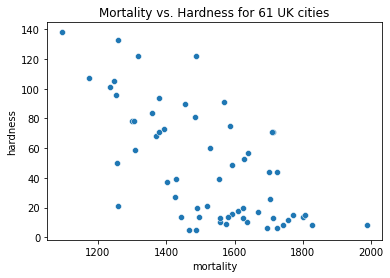

In [223]:
sns.scatterplot(data=df, x="mortality", y="hardness")
plt.title("Mortality vs. Hardness for 61 UK cities")

In [224]:
# Коэффициеты корреляции Пирсона
df[['mortality' , 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [225]:
# Коэффициеты корреляции Спирмена
df[['mortality' , 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [226]:
X, y = df[['hardness']], df[['mortality']]

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [228]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [229]:
model.coef_, model.intercept_

(array([[-3.13167087]]), array([1668.97229773]))

In [230]:
y_predict = model.predict(X_test)

In [231]:
# коэффициент детерминации
r2_score(y_test, y_predict)

0.5046490611017092

Text(0.5, 1.0, 'Residual vs. Mortality compering with mean residual')

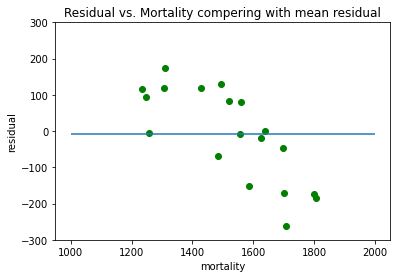

In [232]:
# График остатков
# plt.scatter(y_test, y_predict - y_test)
plt.ylim([-300, 300])
plt.scatter(y_test, y_predict - y_test, color = 'green')
plt.hlines(np.mean(y_predict - y_test), xmin=1000, xmax=2000)
plt.xlabel("mortality")
plt.ylabel("residual")
plt.title("Residual vs. Mortality compering with mean residual")

In [233]:
np.mean(y_predict - y_test)

mortality   -9.402032
dtype: float64

Коэффициент корреляции Пирсона равен -0.65, корреляция по Спирмену равна -0.63, что вроде бы указывает на наличие обратной зависимости между величинами т.е. чем больше жёсткость воды тем ниже сметрность. Но в данном случае, скорее всего, присутствует другой, неучтённый фактор. Об этом говорит коэффициент детерминации 0.5 и не симметричное распределение остатков относительно среднего. Хотя и среднее остатков близко к нулю. Хорошо было бы посмотреть статистику по сердечно сосудистым заболеваниям в этих городах.

## Задание 2. 

Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

* Разделить данные на 2 группы
* Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

Text(0.5, 1.0, 'Mortality vs. Hardness for 61 UK cities groupd by region')

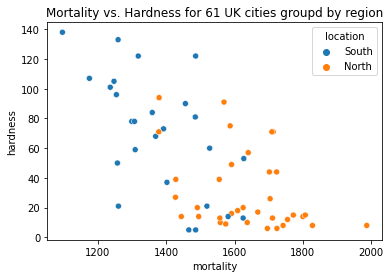

In [253]:
sns.scatterplot(data=df, x="mortality", y="hardness", hue="location")
plt.title("Mortality vs. Hardness for 61 UK cities groupd by region")

In [235]:
df_north = df[ df['location'] == 'North']

In [236]:
df_south = df[ df['location'] == 'South' ]

In [260]:
display(df_north.mean(), df_south.mean())

Unnamed: 0      30.742857
mortality     1633.600000
hardness        30.400000
dtype: float64

Unnamed: 0      31.346154
mortality     1376.807692
hardness        69.769231
dtype: float64

In [237]:
# Север Англии

# Коэффициеты корреляции Пирсона
df_north[['mortality' , 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [238]:
# Коэффициеты корреляции Спирмена
df_north[['mortality' , 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [239]:
NX, Ny = df_north[['hardness']], df_north[['mortality']]
NX_train, NX_test, Ny_train, Ny_test = train_test_split(NX, Ny, test_size=0.20, random_state=42)

In [240]:
model_north = LinearRegression()
model_north.fit(NX_train, Ny_train)

LinearRegression()

In [241]:
Ny_predict = model.predict(NX_test)

In [242]:
r2_score(Ny_test, Ny_predict)

-0.5147926568876533

Text(0.5, 1.0, 'Residual for test Mortality data \n compered to average for north region')

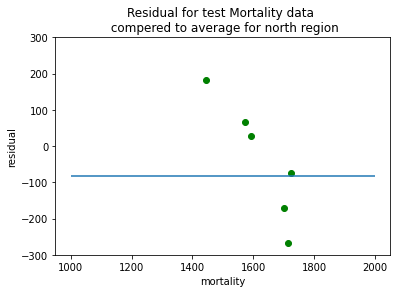

In [257]:
# plt.scatter(Ny_test, Ny_predict - Ny_test)
plt.ylim([-300, 300])
plt.scatter(Ny_test, Ny_predict - Ny_test, color = 'green')
plt.hlines(np.mean(Ny_predict - Ny_test), xmin=1000, xmax=2000)
plt.xlabel("mortality")
plt.ylabel("residual")
plt.title("Residual for test Mortality data \n compered to average for north region")

In [244]:
# Юг Англии

# Коэффициеты корреляции Пирсона
df_south[['mortality' , 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [245]:
# Коэффициеты корреляции Спирмен
df_south[['mortality' , 'hardness']].corr(method = 'spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [246]:
SX, Sy = df_south[['hardness']], df_south[['mortality']]
SX_train, SX_test, Sy_train, Sy_test = train_test_split(SX, Sy, test_size=0.20, random_state=42)

In [247]:
model_south = LinearRegression()
model_south.fit(SX_train, Sy_train)

LinearRegression()

In [248]:
Sy_predict = model.predict(SX_test)

In [249]:
r2_score(Sy_test, Sy_predict)

-2.7701371886211184

In [250]:
Sy_res = Sy_predict - Sy_test

Text(0.5, 1.0, 'Residual for test Mortality data \n compered to average for south region')

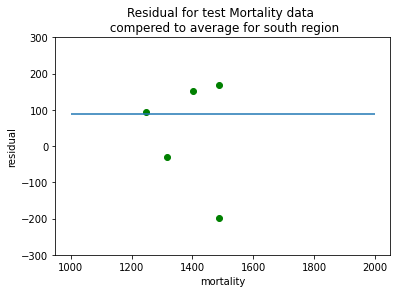

In [256]:
plt.ylim([-300, 300])
plt.scatter(Sy_test, Sy_predict - Sy_test, color = 'green')
plt.hlines(np.mean(Sy_predict - Sy_test), xmin=1000, xmax=2000)
plt.xlabel("mortality")
plt.ylabel("residual")
plt.title("Residual for test Mortality data \n compered to average for south region")

Если рассматривать регионы по отдельности то, даже при не плохих коэффициентах Пирсона и Спирмана, никакой зависимости не наблюдаеться т.к. остатки сильно смещены относительно нуля.

Связь смертности с жёсткостью воду достоверно установить не удалось. Скорее присутствует зависимоть смертности от региона проживания: север - юг.